In [1]:
import pandas as pd

In [3]:
full_df = pd.read_csv('../dataset/complete_dataset.csv')
full_df.drop_duplicates(subset=['IMDB_ID'], inplace=True)

In [4]:
from pathlib import Path
import numpy as np
def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >=2 :
            filenames.append(line_data[0])
            embeddings.append(line_data[1:])
    return np.asarray(filenames), np.asarray(embeddings)

In [5]:
filenames, embeddings = read_embeddings('../dataset/embeddings.txt')

In [6]:
filenames.shape, embeddings.shape

((3729,), (3729, 300))

In [8]:
df = full_df[full_df['filename'].isin(filenames)].copy()
df.shape

(3729, 19)

In [9]:
df.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
706,6416324.xml,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",movie,The Count of Monte Cristo - Part 2: Retribution,"Le comte de Monte Cristo, 2ème époque: Le chât...",0.0,1943.0,NaN,90,7.0,80.0
2784,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75,nm0440757,"nm0440757,nm0833141,nm1127102",movie,Hände hoch oder ich schieße,Hände hoch oder ich schieße,0.0,1966.0,NaN,75,5.8,36.0
3085,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78,nm0816215,nm0816215,movie,La lune avec les dents,La lune avec les dents,0.0,1967.0,NaN,78,7.0,34.0
6044,5594522.xml,Dein Vater war ein ausgezeichneter Kämpfer . A...,tt3141954,"Action,Adventure",1978.0,Cantonese,untokenisiert,82,nm1172472,NaN,movie,Brawl Busters,Sa-dae-tong-iue-moon,0.0,1978.0,NaN,82,6.2,31.0
6281,5618549.xml,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96,nm0814232,"nm0032816,nm0793999,nm0814232",movie,Sûpâ gun redei Wani Bunsho,Sûpâ gun redei Wani Bunsho,0.0,1979.0,NaN,96,5.7,44.0


In [10]:
# check if everything is in right order for joining data
(df.filename == filenames).all()

True

In [11]:
df['embedding'] = [e for e in embeddings]

In [12]:
from umap import UMAP

reducer = UMAP(n_neighbors=15)

Xr = reducer.fit_transform(embeddings)

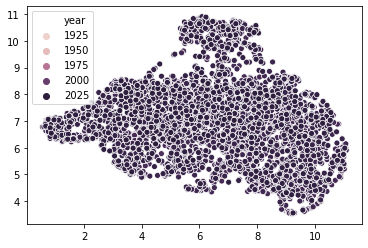

In [14]:
import seaborn as sns

sns.scatterplot(x=Xr[:,0], y=Xr[:,1], hue=df.year)

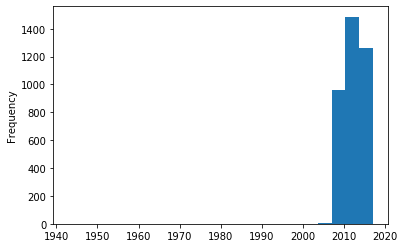

In [21]:
df.year.plot(kind="hist", bins=len(df.year.unique()))

In [20]:
len(df.year.unique())

22